### Data Preparation
Reasons for choosing news data as social media data:

     1. The property market discussions on social media such as Fb and Tweeter basically only consist of advertisements, and the few remaining groups are either media operations or pessimistic, and it is difficult to make effective analysis.

     2. Many of the data on the traditional property market forums are information consultation posts, many of which are vomiting, and there is very little effective information.

Acquire the property market news data in the past five years as social media data that needs to be processed, and obtain consumer preferences through text processing and analysis.

In [2]:
import pandas as pd
from os import path
from urllib import request
import pycantonese as pc
import jieba.posseg as pseg
import jieba
import jieba.analyse
from collections import Counter
import re
from snownlp import SnowNLP

In [28]:
news = pd.read_csv('economic_data.csv')
news

,Unnamed: 0,title,time
0,0,香港置地指旗下写字楼的空置率约5.5%(299),2021-11-18
1,1,团结香港基金对公屋总建屋量预测调整感失望(517),2021-11-16
2,2,"香港""北部都会区""效应洪水桥住宅项目热销(423)",2021-11-11
3,3,香港盛洋投资终止出售美国写字楼物业买卖方存在意见分歧(481),2021-11-08
4,4,香港合能控股赴港递交招股书总土地储备440万平方米(401),2021-10-31
...,...,...,...
6970,6970,香港供楼负担比率降至24%,2001-05-17
6971,6971,林奋强指出香港居屋政策拖累楼市,2001-05-17
6972,6972,香港地产界人士认为香港供楼支出将低于租金支出实质利率仍高达七厘,2001-05-17
6973,6973,香港人在深置业需求面面观,2001-05-17


#### Data Extraction
Although news headlines already contain the key information extraction process of the main text, the meaning of many headlines is not enough to provide effective information, such as:
        
        ‘金管局公布最新住宅按揭統計數據’，
        
        ‘今日地產新聞摘要’，
        
        ‘四大代理評樓市’，

Therefore, when we actually analyze it, selecting the text will have a better effect. Here we will show and explain and choose the title.

In [29]:
news_content = []

for i in news.index:
    news_content.append(str(news['title'][i]))

news_content[:5]

['香港置地指旗下写字楼的空置率约5.5%(299)',
 '团结香港基金对公屋总建屋量预测调整感失望(517)',
 '香港"北部都会区"效应洪水桥住宅项目热销(423)',
 '香港盛洋投资终止出售美国写字楼物业买卖方存在意见分歧(481)',
 '香港合能控股赴港递交招股书总土地储备440万平方米(401)']

### Segmentation

### Simplified Chinese
For Simplified Chinese, the word segmentation effect of jieba's default corpus is good enough.

#### JIEBA (default corpus)

In [31]:
words = []

for i in range(len(news_content)):
     words.append(jieba.lcut(news_content[i],cut_all=False))

for i in range(0,10):
     print(words[i])

['香港', '置', '地', '指', '旗下', '写字楼', '的', '空置率', '约', '5.5%', '(', '299', ')']
['团结', '香港', '基金', '对', '公屋', '总建', '屋量', '预测', '调整', '感', '失望', '(', '517', ')']
['香港', '"', '北部', '都会区', '"', '效应', '洪水', '桥', '住宅', '项目', '热销', '(', '423', ')']
['香港', '盛洋', '投资', '终止', '出售', '美国', '写字楼', '物业', '买卖方', '存在', '意见分歧', '(', '481', ')']
['香港', '合能', '控股', '赴', '港', '递交', '招股书', '总', '土地储备', '440', '万平方米', '(', '401', ')']
['香港', '华人', '置业', '以', '7771.02', '万美元', '出售', '本', '金额', '2.55', '亿美元', '佳兆业', '...']
['香港', '住宅', '楼价', '自', '2021', '年', '7', '月', '创新', '高后', '连续', '两月', '回落', '(', '380', ')']
['香港', '修订', '强', '积金', '条例', '为', '"', '积金', '易', '"', '平台', '提供', '法律', '基础', '(', '541', ')']
['香港', '丽新', '发展', '2021', '全年', '录得', '营收', '59.87', '亿港元', '已', '确认', '销售', '25', '亿', '...']
['香港特区', '立法会', '通过', '房租', '务', '管制', '条例', '草案', '(', '579', ')']


### Cantonese

Cantonese (Hong Kong) currently has fewer NLP tools. The only mainstream ones are jieba's traditional Chinese processing tools and PyCantonese.

We use two tools to process our text separately to compare effects.

In [7]:
news_cantonese = pd.read_csv('10year28Hse.csv')

cantonese_content = []

for i in news_cantonese.index:
    cantonese_content.append(str(news_cantonese['title'][i]))

#### JIEBA (default corpus)

In [8]:
words_cantonese = []

for i in range(len(cantonese_content)):
     words_cantonese.append(jieba.lcut(cantonese_content[i],cut_all=False))

words_cantonese[:10]

[['港', '明天', '會', '更好', ' ', '如何', '減', '失落', '社群'],
 ['港鐵東', '涌地', '流標', '，', '是', '因為', '補地', '價貴', '？'],
 ['市民', '住屋', '優先', '次序', ' ', '低', '於', '螢火蟲', '？'],
 ['「', '售後租', '回', '」', '的', '注意', '事項'],
 ['海外', '物業', '買', '賣', ' ', '核心', '問題', '不能', '忽略'],
 ['私樓', '賣', '地', '條款', '考慮', '設', '最細', '單位', '面積'],
 ['代理', '爭盤', '打架', ' ', '誰', '要', '負責任'],
 ['近', '四成', '受訪', '青年', '因置業', '推遲', '結婚'],
 ['面對', '新', '時勢', ' ', '地產', '代理', '必須', '增值'],
 ['新一期', '居屋', '料', '年底', '推']]

It can be seen that after word segmentation is performed through the corpus preset by Jieba, there are phenomena of excessive word segmentation and wrong segmentation. Here, because the word frequency and part of speech in the jieba sub-word corpus are based on the Mandarin style, it is not suitable for direct word segmentation in traditional Chinese.

### JIEBA (Big Dictionary)

Fortunately, Jieba has launched a bigger dictionary that has better support for traditional Chinese for traditional Chinese word segmentation, so next we try to use this dictionary for word segmentation processing.

In [9]:
# Get the Big dict for Cantonese of jieba
dir = path.abspath(path.dirname('C:/Users/Nicka/Desktop/Programming for data science/Group Project/Text_ana/'))
url = 'https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big'
path_ = path.join(dir, 'dict.big.txt')

if not path.exists(path_):
    request.urlretrieve(url, path)

# Set the corpus as the Big dict
jieba.initialize()   
jieba.set_dictionary('dict.big.txt')

words_cantonese = []

for i in range(len(cantonese_content)):
     words_cantonese.append(jieba.lcut(cantonese_content[i],cut_all=False))

words_cantonese[:10]

Building prefix dict from c:\Users\Nicka\Desktop\Programming for data science\Group Project\Text_ana\dict.big.txt ...
Loading model from cache C:\Users\Nicka\AppData\Local\Temp\jieba.u6f7d4f63166dd537d3cef7e7bcb20cc2.cache
Loading model cost 0.826 seconds.
Prefix dict has been built successfully.


[['港', '明天', '會', '更好', ' ', '如何', '減', '失落', '社群'],
 ['港鐵東', '涌地', '流標', '，', '是', '因為', '補', '地價', '貴', '？'],
 ['市民', '住屋', '優先', '次序', ' ', '低於', '螢火蟲', '？'],
 ['「', '售後', '租回', '」', '的', '注意事項'],
 ['海外', '物業', '買賣', ' ', '核心', '問題', '不能', '忽略'],
 ['私樓', '賣地', '條款', '考慮', '設', '最細', '單位', '面積'],
 ['代理', '爭盤', '打架', ' ', '誰', '要', '負責', '任'],
 ['近', '四成', '受訪', '青年', '因', '置業', '推遲', '結婚'],
 ['面對', '新', '時勢', ' ', '地產', '代理', '必須', '增值'],
 ['新一期', '居屋', '料', '年底', '推']]

It can be seen that the word segmentation effect of using jieba Big Dictionary is much better. However, Jieba's traditional vocabulary is still a habit of using Mandarin Chinese.

It does not consider the context in which Cantonese is used. For example, words such as "Tung Chung Di" will be erroneously split.

### PyCantonese

In [10]:
# using pycantonese to do the segment
words_cantonese = []

for i in range(len(cantonese_content)):
     words_cantonese.append(pc.segment(cantonese_content[i]))

words_cantonese[:10]

[['港', '明天', '會', '更', '好', '如何', '減', '失落', '社', '群'],
 ['港鐵', '東涌', '地', '流標', '，', '是', '因為', '補', '地', '價', '貴', '？'],
 ['市民', '住屋', '優先', '次序', '低於', '螢火蟲', '？'],
 ['「', '售', '後', '租', '回', '」', '的', '注意事項'],
 ['海外', '物業', '買賣', '核心', '問題', '不能', '忽略'],
 ['私樓', '賣', '地', '條款', '考慮', '設', '最細', '單位', '面積'],
 ['代理', '爭', '盤', '打架', '誰', '要', '負責任'],
 ['近', '四成', '受訪', '青年', '因', '置業', '推遲', '結婚'],
 ['面對', '新', '時勢', '地產', '代理', '必須', '增值'],
 ['新', '一', '期', '居屋', '料', '年底', '推']]

Obviously, the word segmentation effect of some nouns in PyCantonese is better than that of Jieba, but many words are over-splitting and lose their meaning.

In fact, the corpus of the PyCantonese project is mainly dialogue data, and the genre is not formal. Our news projects have a lot of formal written text.

### Merge dictionary

So next, we try to merge the two effective dictionaries by adjusting the word frequency and use them as the prefix dictionary for our text segmentation.

In [11]:
# Download the HKcancor corpus
corpus = pc.hkcancor()
c = Counter()
tokens = corpus.tokens(by_utterances=False)

for token in tokens:
    word = token.word
    pos = token.pos
    if pos.isalpha():
        c[word, pos.lower()] += 1

# Save the corpus as the dict_PyCantonese file
with open(path.join(dir, 'dict_PyCantonese.txt'), 'w', encoding='utf8') as f:
    for (word, pos), freq in c.most_common():
        print(word, freq, pos, file=f)

For the weight adjustment of the combined thesaurus, the method we adopted is to adjust the word frequency of PyCantonese so that the word frequency of the word "嘅" in PyCantonese is consistent with the word frequency of the word "的" in the stammering word database. This is only an approximate method, not a combination of the two in equal proportions.

In [12]:
# merge the two corpus

# Get the frequency of '的'
counter_jieba = Counter()

with open(path.join(dir, 'dict.big.txt'), encoding='utf8') as f:
    for line in f:
        word, freq, tag = line.rstrip('\n').split(' ')
        counter_jieba[word, tag] += int(freq)

de_freq = counter_jieba['的', 'uj']

# Get the frequency of '嘅'
counter_Pycantonese = Counter()

with open(path.join(dir, 'dict_PyCantonese.txt'), encoding='utf8') as f:
    for line in f:
        word, freq, tag = line.rstrip('\n').split(' ')
        counter_Pycantonese[word, tag] += int(freq)

ge_freq = counter_Pycantonese['嘅', 'u']

# merge
c = Counter()
w = de_freq / ge_freq

for k, v in counter_jieba.items():
    c[k] += v

for k, v in counter_Pycantonese.items():
    c[k] += round(v * w)

with open(path.join(dir, 'merged_dict.txt'), 'w', encoding='utf8') as f:
    for (word, pos), freq in c.most_common():
        print(word, freq, pos, file=f)

Next, we use the adjusted corpus for word segmentation to see the final effect

In [13]:
jieba.initialize()
jieba.set_dictionary('merged_dict.txt')

words_cantonese = []

for i in range(len(cantonese_content)):
     words_cantonese.append(pc.segment(cantonese_content[i]))

words_cantonese[:10]

[['港', '明天', '會', '更', '好', '如何', '減', '失落', '社', '群'],
 ['港鐵', '東涌', '地', '流標', '，', '是', '因為', '補', '地', '價', '貴', '？'],
 ['市民', '住屋', '優先', '次序', '低於', '螢火蟲', '？'],
 ['「', '售', '後', '租', '回', '」', '的', '注意事項'],
 ['海外', '物業', '買賣', '核心', '問題', '不能', '忽略'],
 ['私樓', '賣', '地', '條款', '考慮', '設', '最細', '單位', '面積'],
 ['代理', '爭', '盤', '打架', '誰', '要', '負責任'],
 ['近', '四成', '受訪', '青年', '因', '置業', '推遲', '結婚'],
 ['面對', '新', '時勢', '地產', '代理', '必須', '增值'],
 ['新', '一', '期', '居屋', '料', '年底', '推']]

In theory, although our merging method is relatively rough, the performance of the new corpus in processing Cantonese words and proper nouns should be improved.

Due to the limited display samples, the results of some word segmentation displayed have not changed much, but it can still be seen that some words have been split, and the granularity has been further increased, which provides a basis for subsequent word frequency statistics.

### Text preprocessing
——After word segmentation, remove useless tags and stop words

In [36]:
def text_process(text):
    # Remove English numbers and special symbols
    r1 =  "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+""'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】\"]"
    r2 = '[a-zA-Z0-9]' 
    # Removing key symbols and English numbers before word segmentation will affect word segmentation
    
    for i in range(len(text)):
        text[i] = re.sub(r1,'',text[i])
        text[i] = re.sub(r2,'',text[i])

    # Remove stop words
    stopwords = pc.stop_words()

    # Remove useless tags
    useless_label = {'\r\n','\r','\u3000',' ','','[',']'}
    text = list(filter(lambda x:x not in stopwords, text))
    text = list(filter(lambda x:x not in useless_label, text))
    return text

for i in range(len(words)):
    words[i] = ' '.join(text_process(words[i]))

words[:5]

['香港 置 地 指 旗下 写字楼 的 空置率 约',
 '团结 香港 基金 对 公屋 总建 屋量 预测 调整 感 失望',
 '香港 北部 都会区 效应 洪水 桥 住宅 项目 热销',
 '香港 盛洋 投资 终止 出售 美国 写字楼 物业 买卖方 存在 意见分歧',
 '香港 合能 控股 赴 港 递交 招股书 总 土地储备 万平方米']

It can be seen that even though we have removed the stop words, there is still too much useless information after the word segmentation.

——For sentiment analysis, we mainly focus on words such as adjectives and verbs that can express market trends and consumer preferences.

So we re-segment the text and perform part-of-speech tagging to filter out the word types we need.

#### Part-of-speech tagging

In [37]:
jieba.enable_paddle() # Start paddle mode

words_new = []

for i in range(len(news_content)):
    words_new.append(pseg.cut(news_content[i],use_paddle=True))

Paddle enabled successfully......


In [38]:
for word,flag in words_new[0]:
    print('%s %s' % (word, flag))

香港 LOC
置地指 v
旗下 n
写字楼 n
的 u
空置率 n
约 d
5.5% m
( w
299 m
) w


#### Emotional Word Extraction

In [39]:
words_key = []
key_set = {'v','vd','vn','a','ad','an','d'}

for i in range(len(words_new)):
    words_key.append([])
    for word,flag in words_new[i]:
        if flag in key_set:
            words_key[i].append(word)

# Text preprocessing
for i in range(len(words_key)):
    words_key[i] = ' '.join(text_process(words_key[i]))

words_key[:5]

['', '团结 总 建 预测 失望', '都会 热销', '终止 出售 存在', '合 能 控股 赴 递交 总 储备']

#### Standardization

——Stemming and lemmatization

Not currently supported, no formed corpus

### Text Analysis

#### Statistics

Use jieba's own TF-IDF keyword extraction, and also remove the stop words (IDF)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# The following two ways to count the TF-IDF value can be

# This class will directly convert the words in the text into a TF-IDF matrix, 
# The matrix element a[i][j] represents the TF-IDF value of the word j in the text of type i
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(words_key)
X.toarray().sum(axis=0)
data = {'word': vectorizer.get_feature_names(),
        'tfidf': X.toarray().sum(axis=0).tolist()}

df = pd.DataFrame(data)

df_new = df.sort_values(by="tfidf" , ascending=False) 
df_new


# This class will convert the words in the text into a word frequency matrix. 
# The matrix element a[i][j] represents the word frequency of word j in the text of type i
vectorizer = CountVectorizer()
# This category will count the tf-idf weight of each word     
transformer = TfidfTransformer()
# Convert text to word frequency matrix
X = vectorizer.fit_transform(words_key)
# Calculate tf-idf
tfidf = transformer.fit_transform(X)  
tfidf.toarray().sum(axis=0)
data = {'word': vectorizer.get_feature_names(),
        'tfidf': X.toarray().sum(axis=0).tolist()}

df = pd.DataFrame(data)

df_new = df.sort_values(by="tfidf" , ascending=False) 
df_new

,word,tfidf
1221,投资,142.840814
12,上市,132.320524
1138,成交,119.702583
687,同比,117.430926
2514,销售,113.938539
...,...,...
925,将近,0.445738
516,务实,0.444589
2534,间接,0.439179
2337,较多,0.432752


### Sentiment Analysis (Title)

——Take a month as a time slice to count the emotional average index within a single month

——Use SnowNLP to quickly analyze news sentiment based on news headline content

——The title is the simplification of the content and the extraction of key information. We can get a basic reference value by performing sentiment analysis on the title (baseline)

In [3]:
news = pd.read_csv('economic_data.csv')

# Add sentiment indicator
senti_score = []
time_slice = []

for i in range(len(news.index)):
    time_slice.append(news['time'][i][0:7])
    senti_score.append(SnowNLP(news['title'][i]).sentiments)

In [4]:
# Calculate average sentiment score
senti_df = pd.DataFrame({'time_slice':time_slice,'senti_score':senti_score})  
    
mean_senti = pd.DataFrame(senti_df.groupby('time_slice').aggregate('mean'))
mean_senti.sort_values('time_slice',inplace=True)
mean_senti.to_csv('month_sentiment_SnowNLP.csv')
mean_senti

,senti_score
time_slice,
2001-05,0.718250
2001-06,0.716307
2001-07,0.739726
2001-08,0.730730
2001-09,0.808427
...,...
2021-07,0.654672
2021-08,0.805227
2021-09,0.775407


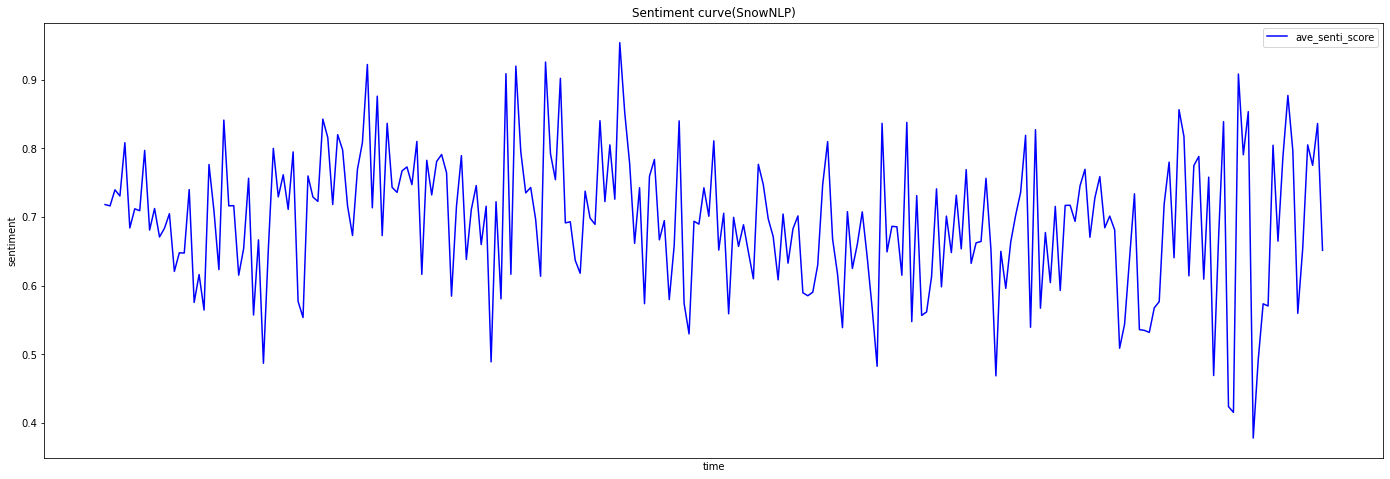

In [5]:
# Sentiment indicator visualization example
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 8))
plt.plot(mean_senti['senti_score'], color='b', label = 'ave_senti_score')
plt.xlabel('time')
plt.ylabel('sentiment')
plt.xticks(())
plt.title("Sentiment curve(SnowNLP)")
plt.legend(loc = 'best')
plt.show()

### Sentiment analysis(correction)

——Through the data set that comes with SnowNLP, the official recommendation is that the data calculation accuracy of e-commerce reviews is relatively high.

——So we try to calculate the sentiment value based on the labeled sentiment dictionary, and use your own data to train the model.

—— There are a Chinese sentiment dictionary that are widely used at present: BosonNLP sentiment dictionary. We use this industry standard emotional dictionaries to define the emotional value of our data.

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Nicka\AppData\Local\Temp\jieba.cache
Loading model cost 0.460 seconds.
Prefix dict has been built successfully.


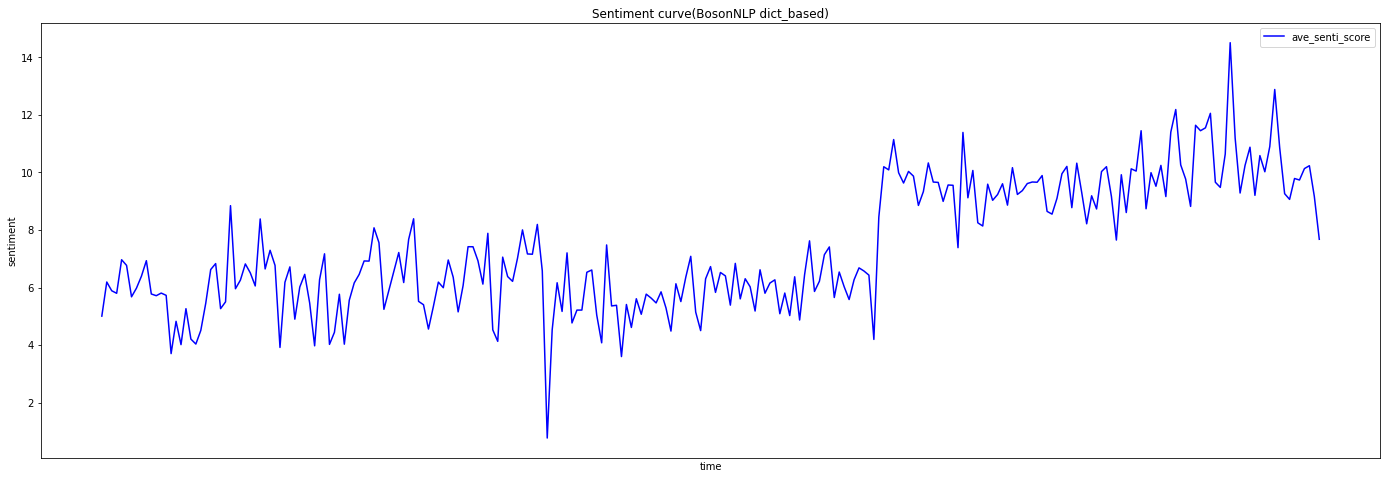

In [6]:
# Load dictionary
bosonNLP_sentiment = pd.read_table("BosonNLP_sentiment_score.txt",sep= " ",names=['key','score'])
key = bosonNLP_sentiment['key'].values.tolist()
score = bosonNLP_sentiment['score'].values.tolist()

# Extract the text
news_content = []
for i in news.index:
    news_content.append(str(news['title'][i]))

# Calculate sentiment score
def getscore(text):
    segs = jieba.lcut(text,cut_all=False)  # here we use the simplify CN as example
    score_list  = [score[key.index(x)] for x in segs if(x in key)]
    return  sum(score_list)

# Do the same work as above(SnowNLP)
senti_score = []
time_slice = []
for i in range(len(news.index)):
    time_slice.append(news['time'][i][0:7])
    # time_slice.append(str(news['year'][i]) + '-' + str(news['month'][i]))
    senti_score.append(round(getscore(news['title'][i]),2))

# Calculate average sentiment score
senti_df = pd.DataFrame({'time_slice':time_slice,'senti_score':senti_score})      
mean_senti = pd.DataFrame(senti_df.groupby('time_slice').aggregate('mean'))
mean_senti.sort_values('time_slice',inplace=True)
mean_senti.to_csv('month_sentiment_Dict.csv')

# Sentiment indicator visualization
plt.figure(figsize=(24, 8))
plt.plot(mean_senti['senti_score'], color='b', label = 'ave_senti_score')
plt.xlabel('time')
plt.ylabel('sentiment')
plt.xticks(())
plt.title("Sentiment curve(BosonNLP dict_based)")
plt.legend(loc = 'best')
plt.show()